In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [2]:
df=pd.read_csv("/kaggle/input/titanic/titanic.csv")
df.set_index('PassengerId',inplace=True)
df.interpolate(inplace=True)
df_encoded = pd.get_dummies(df['Sex'], prefix='Category').astype(int)
df=pd.concat([df,df_encoded],axis=1)
df_encoded=pd.get_dummies(df['Embarked'],prefix='encoded').astype(int)
df=pd.concat([df,df_encoded],axis=1)
df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.corr()['Survived']

Survived           1.000000
Pclass            -0.338481
Age               -0.062164
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Category_female    0.543351
Category_male     -0.543351
encoded_C          0.168240
encoded_Q          0.003650
encoded_S         -0.155660
Name: Survived, dtype: float64

In [3]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Category_female,Category_male,encoded_C,encoded_Q,encoded_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,22.5,1,2,23.4500,1,0,0,0,1


In [4]:
def z_score_normalization(column):
    mean_value = column.mean()
    std_dev = column.std()
    normalized_column = (column - mean_value) / std_dev
    return normalized_column
X_initial = df.drop(columns=['Survived'])
y=df['Survived']
y=np.where(y==0,-1,1)
X = X_initial.apply(z_score_normalization)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train_array=X_train.to_numpy()
X_test_array=X_test.to_numpy()

X.shape

(891, 10)

In [5]:
def fit(X,y,itr,lbd,lr):
    m,n=X.shape
    y_=np.where(y<=0,-1,1)
    w=np.zeros(n)
    b=0
    for _ in range(itr):
        for idx, x_i in enumerate(X):
            condition=y_[idx]*(np.dot(x_i,w)-b)>=1
            if condition:
                w-=lr*(2*lbd*w)
            else:
                w-=lr*(2*lbd*w-np.dot(x_i,y_[idx]))
                b-=lr*(y_[idx])
    return w,b

                
                
                

In [6]:
def predict(X,w,b):
    approx=np.dot(X,w)-b
    return np.sign(approx)

In [7]:
lbd=0.01
lr=0.01
iterations=1000
w,b=fit(X_train_array,y_train,iterations,lbd,lr)
w

array([-0.0742598 , -0.01883783, -0.15177865, -0.05701456,  0.05553098,
        0.55535396, -0.55535396,  0.02682122,  0.04612321, -0.05248941])

[-1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.
 -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.
  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.
  1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.]
accuracy  78.2122905027933 %
the preicions is:  0.7536231884057971
the recall is:  0.7027027027027027


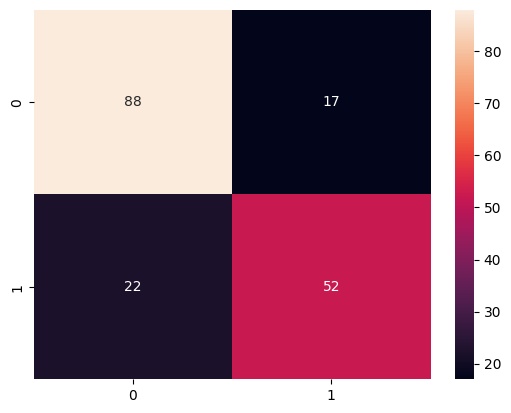

In [8]:
predictions=predict(X_test_array,w,b)
print(predictions)
def accuracy(y_test,y_pred):
    accuracy=np.sum(y_test==y_pred)/len(y_test)
    return accuracy
print("accuracy ",100*accuracy(y_test,predictions),"%")
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")
precision=precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)
print("the preicions is: ",precision)
print("the recall is: ",recall)